In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
plt.style.use('fivethirtyeight')

# Normal Distribution
A continuous probability distribution frequently used to represent unknown values in social/natural sciences.

Defined by:
- mu - mean
- sigma - standard deviation

PDF: (1 / sqrt(2 * pi * sigma^2))^-(((x - mu)^2) / (2 * sigma^2))

In [3]:
def norm_form(x, mu, sigma):
    return ((1 / np.sqrt(2 * np.pi * (sigma**2)))
            * np.exp(-(x - mu)**2 / (2 * sigma**2)))

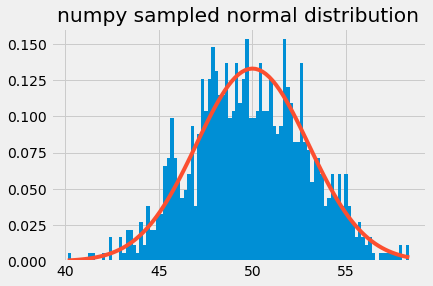

In [4]:
fig, ax = plt.subplots(1,1)
ax.set_title('numpy sampled normal distribution')

# random samples with numpy
mu = 50
sigma = 3
X = np.random.normal(mu, sigma, 1000)
c, x, p = ax.hist(X, 100, density=True)
ax.plot(x, norm_form(x, mu, sigma))

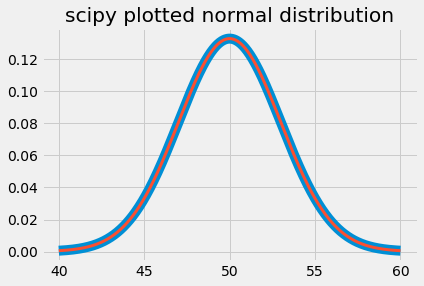

In [5]:
fig, ax = plt.subplots(1,1)
ax.set_title('scipy plotted normal distribution')

class gaussian(stats.rv_continuous):
    """Gaussian Distribution"""
    
    def _pdf(self, x, mu, sigma):
        """The PDF of a Gaussian Distribution"""
        return norm_form(x, mu, sigma)

# using scipy
g = gaussian()
xs = np.linspace(40,60,1000)
ax.plot(xs, g.pdf(xs, mu, sigma), linewidth=10.0)
ax.plot(xs, stats.norm.pdf(xs, mu, sigma), linewidth=3.0)

Text(0.5,1,'sampled normal distribution')

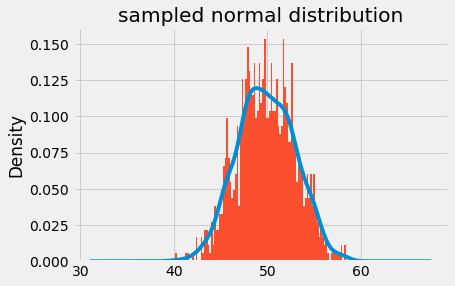

In [6]:
# using pandas/numpy
n_dist = pd.Series(X)
n_dist.plot.density()
hist = n_dist.hist(bins=x, density=True)
hist.set_title('sampled normal distribution')

Text(0.5,1,'true and sampled standard normal distribution')

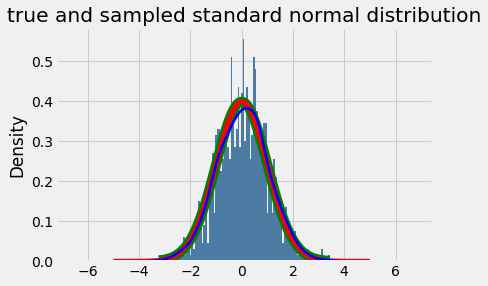

In [7]:
# standard normal distribution with each method
# numpy
s_mu, s_sigma = 0, 1
xs = np.linspace(-5, 5, 1000)
X = np.random.normal(s_mu, s_sigma, 1000)
c, x, p = plt.hist(X, 100, density=True)
plt.plot(x, norm_form(x, s_mu, s_sigma), color='g', linewidth=10.0)

#scipy
plt.plot(xs, g.pdf(xs, s_mu, s_sigma), color='c', linewidth=7.5)
plt.plot(xs, stats.norm.pdf(xs), color='r', linewidth=5.0)

# pandas/numpy
n_dist = pd.Series(X)
n_dist.plot.density(color='b', linewidth=2.5)
hist = n_dist.hist(bins=x, density=True, alpha=0.3)
hist.set_title('true and sampled standard normal distribution')

Text(0.5,1,'Normal Distribution CDF')

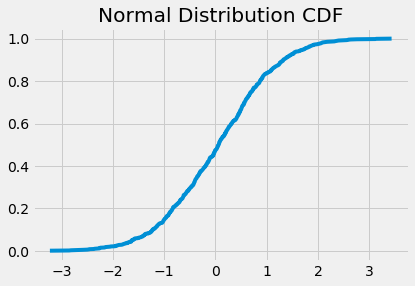

In [8]:
# cdf of normal distribution using pandas
n_dist_pmf = pd.Series()
for i in n_dist.values:
    n_dist_pmf.at[i] = n_dist_pmf.get(i, 0.0) + 1
n_dist_pmf *= (1 / n_dist_pmf.sum())
n_dist_pmf.sort_index(inplace=True)
plot = n_dist_pmf.cumsum().plot()
plot.set_title('Normal Distribution CDF')

# Binomial Distribution
A discrete distribution communicating the number of successes of 'n' independent, yes-no experiements, each with a probability of 'p'.

Bernoulli Distribution is a specific form of this in which only two points are shown (a Bernoulli Trial only consists of a single experiement).

Frequently used as the basis for testing statistical significance.

Also used to model success rate of a sample sized n drawn with replacement from a population of size N.

Defined by:
- n - number of trials
- p - probability of each trial

PMF: (^n_N) * p^N * (1 - p)^(n - N)

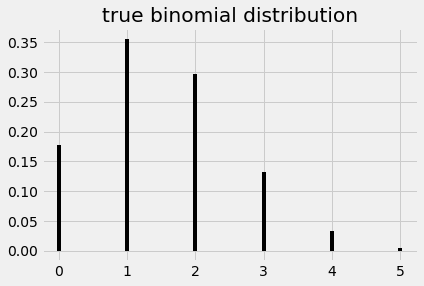

In [9]:
fig, ax = plt.subplots(1,1)
ax.set_title('true binomial distribution')

# true distribution with n and p
n, p = 6, 0.25
max_case = int(stats.binom.ppf(.999, n, p))
xs = np.linspace(0, max_case, max_case+1)
ax.vlines(xs, 0, stats.binom.pmf(xs, n, p))

Text(0.5,1,'scipy')

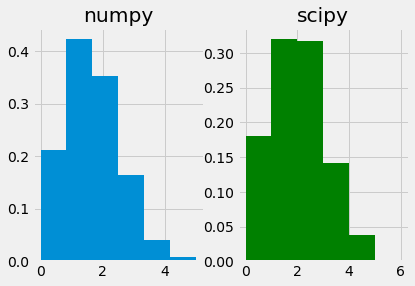

In [10]:
fig, axes = plt.subplots(1, 2, tight_layout=False)

# using numpy
np_binom = pd.Series(np.random.binomial(n, p, 1000))
npb = np_binom.hist(bins=n, ax=axes[0], density=True)
npb.set_title('numpy')

# using scipy
sp_binom = pd.Series(stats.binom.rvs(n, p, size=1000))
spb = sp_binom.hist(bins=n, ax=axes[1], color='g', density=True)
spb.set_title('scipy')

In [11]:
print('np:',np_binom.value_counts(normalize=True).at[0])
print('np:',len(np_binom[(np_binom==0)]) / len(np_binom))
print('sp:',sp_binom.value_counts(normalize=True).at[0])
print('np:',len(sp_binom[(sp_binom==0)]) / len(sp_binom))

np: 0.176
np: 0.176
sp: 0.181
np: 0.181


# Poisson Distribution
A discrete distribution communicating the likelihood of a number of events occurring over a set interval that occur at a constant rate without regard for the last event's occurrence.

Frequently used to approximate the number of calls received by a call center or the number of people entering an establishment over a time-frame during the day.

Defined by:
- lambda - expected number of occurrences
- k - number of occurrences

PMF: (lam^k * e^-lam) / k!

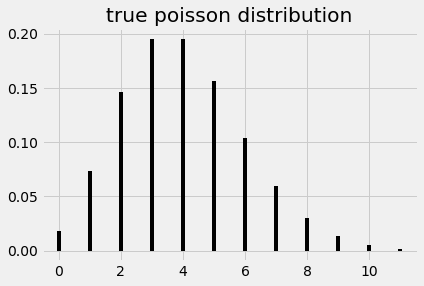

In [12]:
fig, ax = plt.subplots(1,1)
ax.set_title('true poisson distribution')

# true distribution with k and lambda
k, lam = 1000, 4
max_case = int(stats.poisson.ppf(.999, lam))
xs = np.linspace(0, max_case, max_case+1)
ax.vlines(xs, 0, stats.poisson.pmf(xs, lam))

(array([0.07166667, 0.11833333, 0.1725    , 0.15916667, 0.13583333,
        0.14      , 0.02166667, 0.00416667, 0.005     , 0.005     ]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

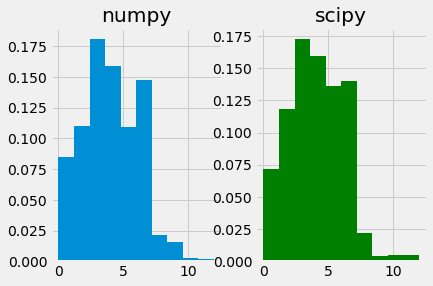

In [13]:
fig, axes = plt.subplots(1, 2, tight_layout=False)
axes[0].set_title('numpy')
axes[1].set_title('scipy')

# using numpy
axes[0].hist(np.random.poisson(lam, k), density=True)

# using scipy
axes[1].hist(stats.poisson.rvs(lam, size=k), density=True, color='g')

# Beta Distribution
A continuous distribution, defined over the interval of [0,1]. It is reliant on two, positive shape parameters. They control the shape of the distribution, as they are exponents of the random variable of the Beta Distribution. The interval over which it is defined makes it great for analyzing percentages and proportions.

Useful in Bayesian inference (analysis/statistics) as it is the conjugate prior distribution for the binomial (and, as consequence, Bernoulli), negative-binomial, and geometric distributions. This means that if the prior is represented by a Beta Distribution, the posterior is also represented by a Beta Distribution.

Defined by:
- alpha - shape parameter
- beta - shape parameter

PDF: it's long, just go  to https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference

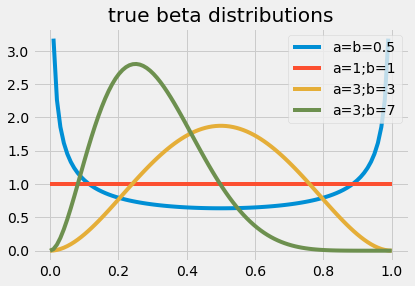

In [14]:
fig, ax = plt.subplots(1,1)

# true distributions with alpha and beta
xs = np.linspace(0, 1, 100)
ax.plot(xs, stats.beta.pdf(xs, 0.5, 0.5), label='a=b=0.5')
ax.plot(xs, stats.beta.pdf(xs, 1.0, 1.0), label='a=1;b=1')
ax.plot(xs, stats.beta.pdf(xs, 3.0, 3.0), label='a=3;b=3')
ax.plot(xs, stats.beta.pdf(xs, 3.0, 7.0), label='a=3;b=7')
ax.set_title('true beta distributions')
ax.legend()

(array([1.23433105, 2.64499511, 1.93966308, 3.87932616, 3.17399413,
        1.41066406, 0.70533203, 1.05799804, 1.05799804, 0.52899902]),
 array([0.06808404, 0.12479492, 0.1815058 , 0.23821668, 0.29492756,
        0.35163844, 0.40834932, 0.4650602 , 0.52177108, 0.57848196,
        0.63519284]),
 <a list of 10 Patch objects>)

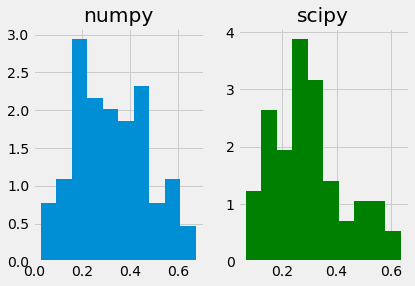

In [15]:
fig, axes = plt.subplots(1,2)
axes[0].set_title('numpy')
axes[1].set_title('scipy')

alpha, beta = 3.0, 7.0

# using numpy
axes[0].hist(np.random.beta(alpha, beta, 100),
             density=True)

# using scipy
axes[1].hist(stats.beta.rvs(alpha, beta, size=100),
             density=True, color='g')

# EoF
More distributions (or more content to the distributions already included) may be added in the future if I want to learn more about them, but, for now, this is all the information I'm going to include in this file.